In [1]:
%pip install deepface opencv-python moviepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Cell 2: Import Libraries
import cv2
from deepface import DeepFace
from moviepy import VideoFileClip
import numpy as np
from IPython.display import display, HTML

Starting real-time sentiment analysis...


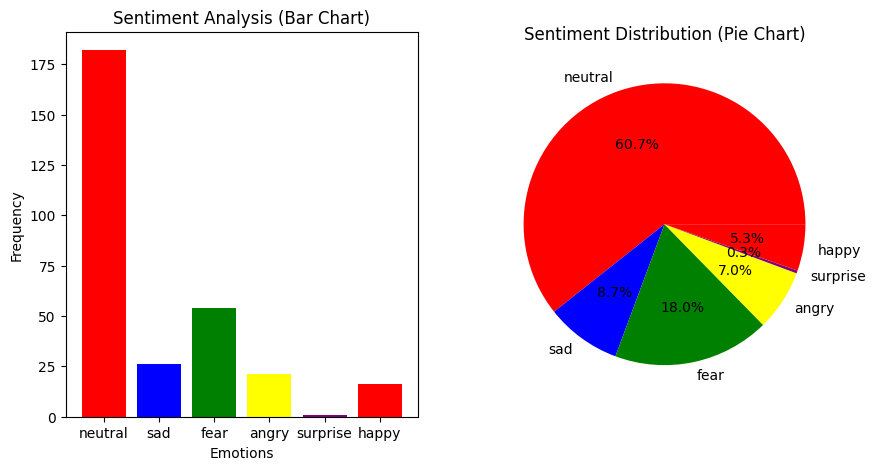

In [5]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np


def analyze_webcam_sentiment(duration=30):
    """
    Analyzes sentiment from webcam in real-time and provides a summary dashboard.
    """
    cap = cv2.VideoCapture(0)  # Open webcam
    sentiment_scores = {}
    frame_count = 0
    
    print("Starting real-time sentiment analysis...")
    
    while frame_count < duration * 10:  # Capture frames for given duration (approx. 10 FPS)
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        try:
            result = DeepFace.analyze(frame_rgb, actions=['emotion'], enforce_detection=False)
            dominant_emotion = result[0]['dominant_emotion']
            sentiment_scores[dominant_emotion] = sentiment_scores.get(dominant_emotion, 0) + 1
            
            cv2.putText(frame, f"Emotion: {dominant_emotion}", (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        except:
            pass  # Skip frames where no face is detected
        
        cv2.imshow("Webcam Sentiment Analysis", frame)
        frame_count += 1
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    
    # Generate the summary dashboard
    plot_sentiment_summary(sentiment_scores)


def plot_sentiment_summary(sentiment_scores):
    """
    Displays a sentiment analysis dashboard using Matplotlib.
    """
    emotions = list(sentiment_scores.keys())
    counts = list(sentiment_scores.values())
    
    plt.figure(figsize=(10, 5))
    
    # Bar Chart
    plt.subplot(1, 2, 1)
    plt.bar(emotions, counts, color=['red', 'blue', 'green', 'yellow', 'purple'])
    plt.xlabel("Emotions")
    plt.ylabel("Frequency")
    plt.title("Sentiment Analysis (Bar Chart)")
    
    # Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=emotions, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow', 'purple'])
    plt.title("Sentiment Distribution (Pie Chart)")
    
    plt.show()


# Run the analysis for 30 seconds
analyze_webcam_sentiment(duration=30)
